In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
plt.rcParams['figure.figsize'] = [16, 8]
plt.style.use("ggplot")

/home/ronggolawe/anaconda3/envs/bap/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x = [
   -1.64934805,  0.52925273,  1.10100092,  0.38566793, -1.56768245,
    1.26195686,  0.92613986, -0.23942803,  0.33933045,  1.14390657,
    0.65466195, -1.36229805, -0.32393554, -0.23258941,  0.17688024,
    1.60774334, -0.22801156,  1.53008133, -1.31431042, -0.27699609
] # inputs
y = [
   -3.67385666,  3.37543275,  6.25390538,  1.41569973, -2.08413872,
    6.71560158,  6.32344159,  2.40651236,  4.54217349,  6.25778739,
    4.98933806, -2.69713137,  1.45705571, -0.49772953,  1.50502898,
    7.27228263,  1.6267433 ,  6.43580518, -0.50291509,  0.65674682
] # outputs

In [4]:
x = np.array(x)
y = np.array(y)

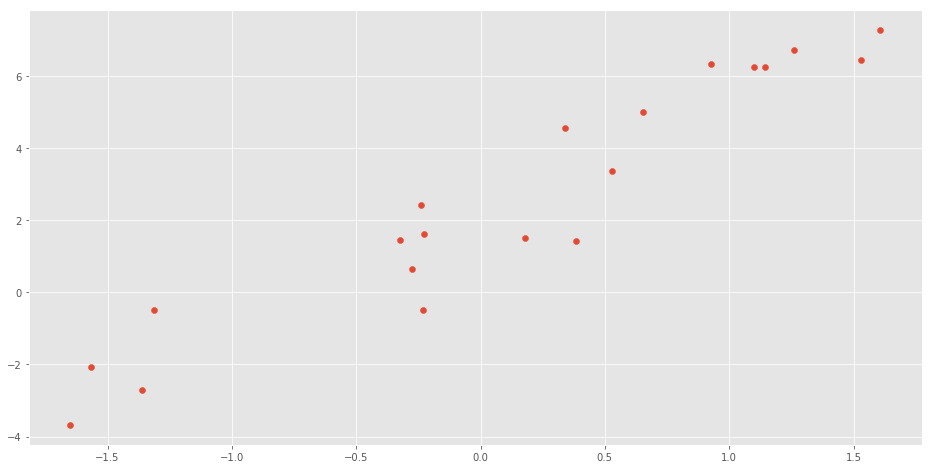

In [5]:
plt.scatter(x, y);

In [6]:
with pm.Model() as model:
    # define priors
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    # predictions
    obs = pm.Normal('observation', a*x + b, s, observed=y)
    
    # use MCMC to sample
    trace = pm.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [error, intercept, slope]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1528.19draws/s]


In [7]:
with pm.Model() as predictive_model:
    a = pm.Normal('slope', 0, 16)
    b = pm.Normal('intercept', 0, 16)
    s = pm.Exponential('error', 1)
    
    x_ = pm.Data('features', x) # a data container, can be changed
    
    obs = pm.Normal('observation', a*x_ + b, s, observed=y)
    
    trace = pm.sample()

AttributeError: module 'pymc3' has no attribute 'Data'